In [66]:
 # Import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

#from sklearn_pandas import DataFrameMapper # Notice that this is actually Sklearn-Pandas library
%matplotlib inline

In [67]:
data = pd.read_csv('gender-dataset.csv', encoding='latin-1')

In [68]:
data

,_unit_id,_golden,_unit_state,_trusted_judgments,_last_judgment_at,gender,gender:confidence,profile_yn,profile_yn:confidence,created,...,profileimage,retweet_count,sidebar_color,text,tweet_coord,tweet_count,tweet_created,tweet_id,tweet_location,user_timezone
0,815719226,False,finalized,3,10/26/15 23:24,male,1.0000,yes,1.0,12/5/13 1:48,...,https://pbs.twimg.com/profile_images/414342229...,0,FFFFFF,Robbie E Responds To Critics After Win Against...,NaN,110964,10/26/15 12:40,6.587300e+17,main; @Kan1shk3,Chennai
1,815719227,False,finalized,3,10/26/15 23:30,male,1.0000,yes,1.0,10/1/12 13:51,...,https://pbs.twimg.com/profile_images/539604221...,0,C0DEED,ÛÏIt felt like they were my friends and I was...,NaN,7471,10/26/15 12:40,6.587300e+17,NaN,Eastern Time (US & Canada)
2,815719228,False,finalized,3,10/26/15 23:33,male,0.6625,yes,1.0,11/28/14 11:30,...,https://pbs.twimg.com/profile_images/657330418...,1,C0DEED,i absolutely adore when louis starts the songs...,NaN,5617,10/26/15 12:40,6.587300e+17,clcncl,Belgrade
3,815719229,False,finalized,3,10/26/15 23:10,male,1.0000,yes,1.0,6/11/09 22:39,...,https://pbs.twimg.com/profile_images/259703936...,0,C0DEED,Hi @JordanSpieth - Looking at the url - do you...,NaN,1693,10/26/15 12:40,6.587300e+17,"Palo Alto, CA",Pacific Time (US & Canada)
4,815719230,False,finalized,3,10/27/15 1:15,female,1.0000,yes,1.0,4/16/14 13:23,...,https://pbs.twimg.com/profile_images/564094871...,0,0,Watching Neighbours on Sky+ catching up with t...,NaN,31462,10/26/15 12:40,6.587300e+17,NaN,NaN
5,815719231,False,finalized,3,10/27/15 1:47,female,1.0000,yes,1.0,3/11/10 18:14,...,https://pbs.twimg.com/profile_images/656336865...,0,0,"Ive seen people on the train with lamps, chair...",NaN,20036,10/26/15 12:40,6.587300e+17,New York Gritty,Central Time (US & Canada)
6,815719232,False,finalized,3,10/27/15 1:57,brand,1.0000,yes,1.0,4/24/08 13:03,...,https://pbs.twimg.com/profile_images/528547133...,0,0,@BpackEngineer Thank you for your patience whi...,NaN,13354,10/26/15 12:40,6.587300e+17,Worldwide,Eastern Time (US & Canada)
7,815719233,False,finalized,3,10/26/15 23:48,male,1.0000,yes,1.0,12/3/12 21:54,...,https://pbs.twimg.com/profile_images/508875440...,0,C0DEED,Gala Bingo clubs bought for å£241m: The UK's l...,NaN,112117,10/26/15 12:40,6.587300e+17,NaN,NaN
8,815719234,False,finalized,3,10/27/15 1:52,female,1.0000,yes,1.0,9/8/15 4:50,...,https://pbs.twimg.com/profile_images/658670112...,0,0,@_Aphmau_ the pic defines all mcd fangirls/fan...,NaN,482,10/26/15 12:40,6.587300e+17,NaN,NaN
9,815719235,False,finalized,3,10/27/15 1:49,female,1.0000,yes,1.0,5/13/11 3:32,...,https://pbs.twimg.com/profile_images/513327289...,0,FFFFFF,@Evielady just how lovely is the tree this yea...,NaN,26085,10/26/15 12:40,6.587300e+17,"Nottingham, England.",Amsterdam


In [69]:
data.describe()

,_unit_id,_trusted_judgments,gender:confidence,profile_yn:confidence,fav_number,retweet_count,tweet_count,tweet_id
count,2.005000e+04,20050.000000,20024.000000,20050.000000,20050.000000,20050.000000,2.005000e+04,2.005000e+04
mean,8.157294e+08,3.615711,0.882756,0.993221,4382.201646,0.079401,3.892469e+04,6.587350e+17
std,6.000801e+03,12.331890,0.191403,0.047168,12518.575919,2.649751,1.168371e+05,5.000124e+12
min,8.157192e+08,3.000000,0.000000,0.627200,0.000000,0.000000,1.000000e+00,6.587300e+17
25%,8.157243e+08,3.000000,0.677800,1.000000,11.000000,0.000000,2.398000e+03,6.587300e+17
50%,8.157294e+08,3.000000,1.000000,1.000000,456.000000,0.000000,1.144150e+04,6.587300e+17
75%,8.157345e+08,3.000000,1.000000,1.000000,3315.500000,0.000000,4.002750e+04,6.587400e+17
max,8.157580e+08,274.000000,1.000000,1.000000,341621.000000,330.000000,2.680199e+06,6.587400e+17


In [70]:
data.shape

(20050, 26)

In [71]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20050 entries, 0 to 20049
Data columns (total 26 columns):
_unit_id                 20050 non-null int64
_golden                  20050 non-null bool
_unit_state              20050 non-null object
_trusted_judgments       20050 non-null int64
_last_judgment_at        20000 non-null object
gender                   19953 non-null object
gender:confidence        20024 non-null float64
profile_yn               20050 non-null object
profile_yn:confidence    20050 non-null float64
created                  20050 non-null object
description              16306 non-null object
fav_number               20050 non-null int64
gender_gold              50 non-null object
link_color               20050 non-null object
name                     20050 non-null object
profile_yn_gold          50 non-null object
profileimage             20050 non-null object
retweet_count            20050 non-null int64
sidebar_color            20050 non-null object
text    

# Cleaning Dataset

In [72]:
data.isnull().sum()

_unit_id                     0
_golden                      0
_unit_state                  0
_trusted_judgments           0
_last_judgment_at           50
gender                      97
gender:confidence           26
profile_yn                   0
profile_yn:confidence        0
created                      0
description               3744
fav_number                   0
gender_gold              20000
link_color                   0
name                         0
profile_yn_gold          20000
profileimage                 0
retweet_count                0
sidebar_color                0
text                         0
tweet_coord              19891
tweet_count                  0
tweet_created                0
tweet_id                     0
tweet_location            7484
user_timezone             7798
dtype: int64

In [73]:
# Drop unnecessary columns/features
data.drop (columns = ['_unit_id',
                      '_last_judgment_at',
                      'user_timezone',
                      'tweet_coord',
                      'tweet_count',
                      'tweet_created', 
                      'tweet_id',
                      'tweet_location',
                      'profileimage',
                      'created'], inplace = True)

In [74]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20050 entries, 0 to 20049
Data columns (total 16 columns):
_golden                  20050 non-null bool
_unit_state              20050 non-null object
_trusted_judgments       20050 non-null int64
gender                   19953 non-null object
gender:confidence        20024 non-null float64
profile_yn               20050 non-null object
profile_yn:confidence    20050 non-null float64
description              16306 non-null object
fav_number               20050 non-null int64
gender_gold              50 non-null object
link_color               20050 non-null object
name                     20050 non-null object
profile_yn_gold          50 non-null object
retweet_count            20050 non-null int64
sidebar_color            20050 non-null object
text                     20050 non-null object
dtypes: bool(1), float64(2), int64(3), object(10)
memory usage: 2.3+ MB


In [75]:
data.head(5)

,_golden,_unit_state,_trusted_judgments,gender,gender:confidence,profile_yn,profile_yn:confidence,description,fav_number,gender_gold,link_color,name,profile_yn_gold,retweet_count,sidebar_color,text
0,False,finalized,3,male,1.0000,yes,1.0,i sing my own rhythm.,0,NaN,08C2C2,sheezy0,NaN,0,FFFFFF,Robbie E Responds To Critics After Win Against...
1,False,finalized,3,male,1.0000,yes,1.0,I'm the author of novels filled with family dr...,68,NaN,0084B4,DavdBurnett,NaN,0,C0DEED,ÛÏIt felt like they were my friends and I was...
2,False,finalized,3,male,0.6625,yes,1.0,louis whining and squealing and all,7696,NaN,ABB8C2,lwtprettylaugh,NaN,1,C0DEED,i absolutely adore when louis starts the songs...
3,False,finalized,3,male,1.0000,yes,1.0,"Mobile guy. 49ers, Shazam, Google, Kleiner Pe...",202,NaN,0084B4,douggarland,NaN,0,C0DEED,Hi @JordanSpieth - Looking at the url - do you...
4,False,finalized,3,female,1.0000,yes,1.0,Ricky Wilson The Best FRONTMAN/Kaiser Chiefs T...,37318,NaN,3B94D9,WilfordGemma,NaN,0,0,Watching Neighbours on Sky+ catching up with t...


'Gender' Attribute (gender)

In [76]:
data['gender'].value_counts()

female     6700
male       6194
brand      5942
unknown    1117
Name: gender, dtype: int64

In [77]:
drop_items_idx = data[data['gender'] == 'unknown'].index

data.drop (index = drop_items_idx, inplace = True)

data['gender'].value_counts()

female    6700
male      6194
brand     5942
Name: gender, dtype: int64

'Profile' Attribute (profile_yn, profile_yn:confidence, profile_yn_gold)

In [78]:
print ('profile_yn information:\n',data['profile_yn'].value_counts())

data[data['profile_yn'] == 'no']['gender']

profile_yn information:
 yes    18836
no        97
Name: profile_yn, dtype: int64


109      NaN
137      NaN
496      NaN
582      NaN
679      NaN
749      NaN
1179     NaN
1664     NaN
1698     NaN
1963     NaN
2118     NaN
2245     NaN
2272     NaN
2377     NaN
2537     NaN
2596     NaN
2717     NaN
2751     NaN
2765     NaN
2886     NaN
2980     NaN
3190     NaN
3195     NaN
3219     NaN
3337     NaN
3381     NaN
3553     NaN
3791     NaN
3942     NaN
4008     NaN
        ... 
12103    NaN
12889    NaN
13007    NaN
14045    NaN
15018    NaN
15243    NaN
15270    NaN
15428    NaN
15450    NaN
15740    NaN
15921    NaN
16208    NaN
16365    NaN
16640    NaN
16886    NaN
16991    NaN
17114    NaN
17163    NaN
18001    NaN
18048    NaN
18063    NaN
18070    NaN
18122    NaN
18136    NaN
18303    NaN
18524    NaN
18700    NaN
18840    NaN
19773    NaN
19842    NaN
Name: gender, Length: 97, dtype: object

In [79]:
drop_items_idx = data[data['profile_yn'] == 'no'].index

data.drop (index = drop_items_idx, inplace = True)

print (data['profile_yn'].value_counts())

data.drop (columns = ['profile_yn','profile_yn:confidence','profile_yn_gold'], inplace = True)

yes    18836
Name: profile_yn, dtype: int64


In [80]:
print (data['gender'].value_counts())

female    6700
male      6194
brand     5942
Name: gender, dtype: int64


In [81]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18836 entries, 0 to 20049
Data columns (total 13 columns):
_golden               18836 non-null bool
_unit_state           18836 non-null object
_trusted_judgments    18836 non-null int64
gender                18836 non-null object
gender:confidence     18836 non-null float64
description           15522 non-null object
fav_number            18836 non-null int64
gender_gold           50 non-null object
link_color            18836 non-null object
name                  18836 non-null object
retweet_count         18836 non-null int64
sidebar_color         18836 non-null object
text                  18836 non-null object
dtypes: bool(1), float64(1), int64(3), object(8)
memory usage: 1.9+ MB


Low-confidence gender (gender:confidence)

In [82]:
print ('Full data items: ', data.shape)
print ('Data with label-confidence < 100%: ', data[data['gender:confidence'] < 1].shape)

Full data items:  (18836, 13)
Data with label-confidence < 100%:  (5032, 13)


In [83]:
drop_items_idx = data[data['gender:confidence'] < 1].index

data.drop (index = drop_items_idx, inplace = True)

print (data['gender:confidence'].value_counts())

data.drop (columns = ['gender:confidence'], inplace = True)

1.0    13804
Name: gender:confidence, dtype: int64


Get rid of remaining useless features

In [84]:
data.drop (columns = ['_golden','_unit_state','_trusted_judgments','gender_gold'], inplace = True)


In [85]:
print (data['gender'].value_counts())

female    5367
male      4653
brand     3784
Name: gender, dtype: int64


In [86]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13804 entries, 0 to 20049
Data columns (total 8 columns):
gender           13804 non-null object
description      11773 non-null object
fav_number       13804 non-null int64
link_color       13804 non-null object
name             13804 non-null object
retweet_count    13804 non-null int64
sidebar_color    13804 non-null object
text             13804 non-null object
dtypes: int64(2), object(6)
memory usage: 970.6+ KB


# Manipulate Text data

Removing stop-words in Twits

In [87]:
from collections import Counter

twit_vocab = Counter()
for twit in data['text']:
    for word in twit.split(' '):
        twit_vocab[word] += 1
twit_vocab.most_common(20)

[('the', 8370),
 ('and', 7964),
 ('to', 4196),
 ('I', 3229),
 ('a', 3064),
 ('of', 2741),
 ('in', 2270),
 ('you', 2173),
 ('for', 2157),
 ('The', 2018),
 ('is', 1878),
 ('on', 1621),
 ('my', 1362),
 ('it', 1205),
 ('', 1184),
 ('with', 1156),
 ('Weather', 1074),
 ('that', 1032),
 ('from', 1022),
 ('me', 1001)]

In [88]:
import nltk

nltk.download('stopwords')

[nltk_data] Error loading stopwords: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>


False

In [89]:
from nltk.corpus import stopwords
stop = stopwords.words('english')

twit_vocab_reduced = Counter()
for w, c in twit_vocab.items():
    if not w in stop:
        twit_vocab_reduced[w]=c

twit_vocab_reduced.most_common(20)

[('I', 3229),
 ('The', 2018),
 ('', 1184),
 ('Weather', 1074),
 ('-', 767),
 ("I'm", 651),
 ('like', 628),
 ('Get', 627),
 ('get', 570),
 ('Updates', 538),
 ('Channel.', 537),
 ('And', 487),
 ('one', 416),
 ('&amp;', 348),
 ('new', 343),
 ('love', 340),
 ('people', 315),
 ('time', 301),
 ('go', 290),
 ('know', 288)]

In [90]:
import re

def preprocessor(text):
    """ Return a cleaned version of text
    """
    # Remove HTML markup
    text = re.sub('<[^>]*>', '', text)
    # Save emoticons for later appending
    emoticons = re.findall('(?::|;|=)(?:-)?(?:\)|\(|D|P)', text)
    # Remove any non-word character and append the emoticons,
    # removing the nose character for standarization. Convert to lower case
    text = (re.sub('[\W]+', ' ', text.lower()) + ' ' + ' '.join(emoticons).replace('-', ''))
    
    return text

print(preprocessor('This!!@ twit :) is <b>nice</b>'))

this twit is nice :)


Lemmatization and Stemming

In [91]:
from nltk.stem import PorterStemmer

porter = PorterStemmer()

def tokenizer(text):
    return text.split()

def tokenizer_porter(text):
    return [porter.stem(word) for word in text.split()]

print(tokenizer('Hi there, I am loving this, like with a lot of love'))
print(tokenizer_porter('Hi there, I am loving this, like with a lot of love'))

['Hi', 'there,', 'I', 'am', 'loving', 'this,', 'like', 'with', 'a', 'lot', 'of', 'love']
['Hi', 'there,', 'I', 'am', 'love', 'this,', 'like', 'with', 'a', 'lot', 'of', 'love']


# Visualize Data

Create a countplot to visualize the amount of each label

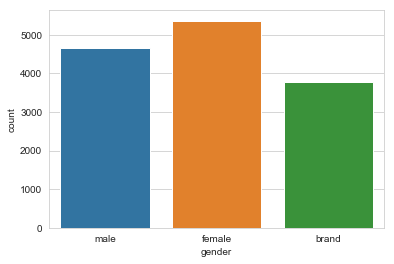

In [92]:
sns.countplot(data['gender'],label="Gender")


Create a bar plot to visualize the amount of favorites and retweets

C:\Program Files\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


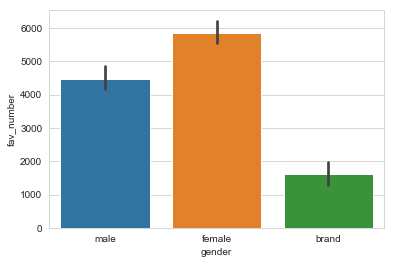

In [93]:
sns.barplot (x = 'gender', y = 'fav_number',data = data)

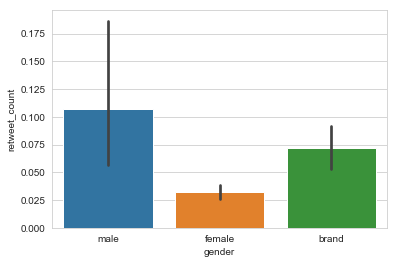

In [94]:
sns.barplot (x = 'gender', y = 'retweet_count',data = data)

Visualize Colors attribute

['C0DEED' 'FFFFFF' '000000' 'EEEEEE' '181A1E' 'A8C7F7' '5ED4DC']


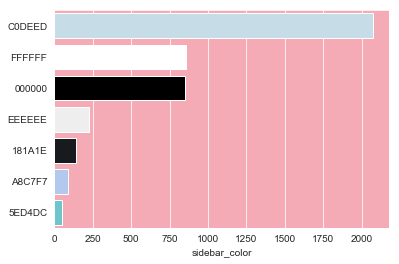

In [95]:
male_top_sidebar_color = data[data['gender'] == 'male']['sidebar_color'].value_counts().head(7)
male_top_sidebar_color_idx = male_top_sidebar_color.index
male_top_color = male_top_sidebar_color_idx.values

male_top_color[2] = '000000'
print (male_top_color)
l = lambda x: '#'+x

sns.set_style("darkgrid", {"axes.facecolor": "#F5ABB5"})
sns.barplot (x = male_top_sidebar_color, y = male_top_color, palette=list(map(l, male_top_color)))

['C0DEED' 'FFFFFF' '000000' 'EEEEEE' '65B0DA' '5ED4DC' 'CC3366']


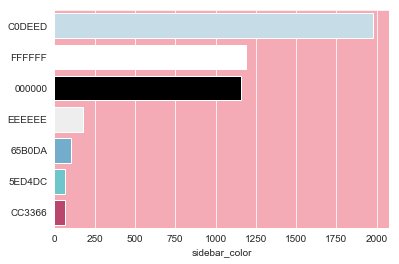

In [96]:
female_top_sidebar_color = data[data['gender'] == 'female']['sidebar_color'].value_counts().head(7)
female_top_sidebar_color_idx = female_top_sidebar_color.index
female_top_color = female_top_sidebar_color_idx.values

female_top_color[2] = '000000'
print (female_top_color)

l = lambda x: '#'+x

sns.set_style("darkgrid", {"axes.facecolor": "#F5ABB5"})
sns.barplot (x = female_top_sidebar_color, y = female_top_color, palette=list(map(l, female_top_color)))

['0084B4' '009999' '3B94D9' '2FC2EF' 'DD2E44' '000000' 'ABB8C2']


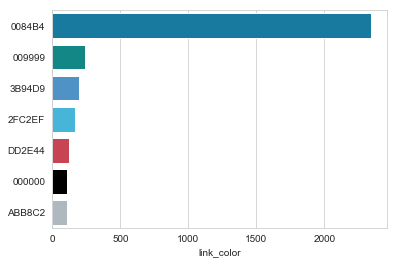

In [97]:
male_top_link_color = data[data['gender'] == 'male']['link_color'].value_counts().head(7)
male_top_link_color_idx = male_top_link_color.index
male_top_color = male_top_link_color_idx.values
male_top_color[1] = '009999'
male_top_color[5] = '000000'
print(male_top_color)

l = lambda x: '#'+x

sns.set_style("whitegrid", {"axes.facecolor": "white"})
sns.barplot (x = male_top_link_color, y = male_top_link_color_idx, palette=list(map(l, male_top_color)))

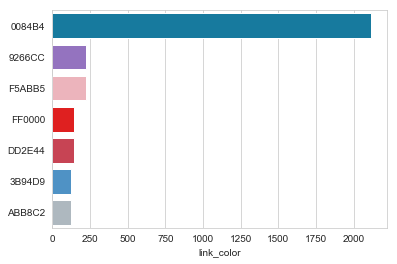

In [98]:
female_top_link_color = data[data['gender'] == 'female']['link_color'].value_counts().head(7)
female_top_link_color_idx = female_top_link_color.index
female_top_color = female_top_link_color_idx.values

l = lambda x: '#'+x

sns.set_style("whitegrid", {"axes.facecolor": "white"})
sns.barplot (x = female_top_link_color, y = female_top_link_color_idx, palette=list(map(l, female_top_color)))

# ------------------------------------------------------------------------------------------------------------

# Questions and Answer

Q1.Which gender has more number of retweet_count?

In [99]:
data_male= data[data['gender'] == 'male']

In [100]:
data_male

,gender,description,fav_number,link_color,name,retweet_count,sidebar_color,text
0,male,i sing my own rhythm.,0,08C2C2,sheezy0,0,FFFFFF,Robbie E Responds To Critics After Win Against...
1,male,I'm the author of novels filled with family dr...,68,0084B4,DavdBurnett,0,C0DEED,ÛÏIt felt like they were my friends and I was...
3,male,"Mobile guy. 49ers, Shazam, Google, Kleiner Pe...",202,0084B4,douggarland,0,C0DEED,Hi @JordanSpieth - Looking at the url - do you...
7,male,The secret of getting ahead is getting started.,80,0000FF,RobinMeske,0,C0DEED,Gala Bingo clubs bought for å£241m: The UK's l...
17,male,"Over enthusiastic F1 fan. Model collector, mu...",5,0084B4,SSmyth2010,0,C0DEED,@coolyazzy94 Ditto - I'm still learning the fa...
18,male,NaN,1,0084B4,DarkToonsGaming,0,C0DEED,@CaribBros @JstSaleem I do but I don't underst...
23,male,You had me from the start,2871,3B94D9,StrictlyAri,0,C0DEED,"YALL LMFAOO RIGHT WHEN THE CHORUS CAME ON, A T..."
24,male,BSc economics graduate #COYS,228,0084B4,JHurkett,0,C0DEED,James Bond premier night at the @Everymancinem...
31,male,Award Winning Author of the paranormal Romance...,103,DD2E44,HalRappaport,0,FFFFFF,All the #magic in Hath No FURY is based on REA...
33,male,K-Smooty~I drink alot. Could be worse. I'm scr...,901,0084B4,TB12ForPrez,0,C0DEED,And got more yards AND points than the Jets ga...


In [101]:
data_male['retweet_count'].sum()

497

In [102]:
data_female= data[data['gender'] == 'female']

In [103]:
data_female

,gender,description,fav_number,link_color,name,retweet_count,sidebar_color,text
4,female,Ricky Wilson The Best FRONTMAN/Kaiser Chiefs T...,37318,3B94D9,WilfordGemma,0,0,Watching Neighbours on Sky+ catching up with t...
5,female,you don't know me.,3901,F5ABB5,monroevicious,0,0,"Ive seen people on the train with lamps, chair..."
8,female,Pll Fan // Crazy about MCD // Ramen is bae,1825,9266CC,pigzilla_,0,0,@_Aphmau_ the pic defines all mcd fangirls/fan...
9,female,"Renaissance art historian, University of Notti...",3115,9266CC,GabrieleNeher,0,FFFFFF,@Evielady just how lovely is the tree this yea...
15,female,NaN,0,0084B4,Ayu7sith4,0,C0DEED,https://t.co/EROGWTFTYo It's a glow of satisfa...
16,female,JMKM_Òü,1762,58185,Toucaan_Samm,0,EEEEEE,@giannaaa28 lmao _Ù÷â_Ù÷â dude I'm hella scare...
20,female,"Artisan specializing in paper mache, print-mak...",18751,3B94D9,jlpeter37,0,0,@CraftYear2015 @isabelpascual thank you for th...
21,female,He bled and died to take away my sins ÛÊ,5454,D41EBF,SarahMaddry,0,65B0DA,All the girls went to sleep and the guys just ...
22,female,union j xxxx,133,0084B4,bethleia,0,C0DEED,@ChrisAOfficial I'm on the right side_Ù÷âÏÎ_Ù...
25,female,Wife to my Coach. Mom to my eight troops. Foll...,1051,0084B4,karenhbullard,0,C0DEED,@SydnieJR except once the Hallmark movies star...


In [104]:
data_female['retweet_count'].sum()

173

In [105]:
data_brand= data[data['gender'] == 'brand']

In [106]:
data_brand

,gender,description,fav_number,link_color,name,retweet_count,sidebar_color,text
6,brand,"A global marketplace for images, videos and mu...",4122,298AAE,Shutterstock,0,0,@BpackEngineer Thank you for your patience whi...
11,brand,highly extraordinary auctions,0,0084B4,eliseotecleo,0,C0DEED,MTG Deals 1x Rank-Up-Magic - The Seventh One -...
13,brand,Come join the fastest blog network online toda...,0,2FC2EF,americacredit,0,181A1E,https://t.co/z4sbWUugd8 What the Nation Will B...
30,brand,Breaking industry news for people who believe ...,1,0084B4,TV_Trax,0,C0DEED,Reality Series Û÷Monica the MediumÛª Gets Se...
34,brand,Everything you need to find a job and keep it!...,72,0084B4,click88sure,0,C0DEED,Gala Bingo clubs bought for å£241m: The UK's l...
36,brand,Our nationÛªs leading voice for #ChildCare. A...,764,EE3124,USAChildCare,0,FFFFFF,Here's how @sesamestreet's Julia will combat t...
38,brand,mirage homage...\ncapri eternal...\nhopeless r...,3399,0084B4,lifessubatomic,0,C0DEED,@Toastburglar @wordwizard85 \nThe trick is mak...
40,brand,A collective of genre specific blogs combining...,29,FA743E,Geek_Initiative,0,0,The Flash: New Look at Danielle Panabaker as K...
42,brand,Love Animals? FetchFind is the new way to find...,711,0084B4,fetchfind,0,C0DEED,#dog walkers needed @FetchPetCareChi from the ...
49,brand,NaN,11,2FC2EF,HighTechPlanet,0,181A1E,Apple: The Great iPhone Unit Debate https://t....


In [107]:
data_brand['retweet_count'].sum()

271

ANSWER: male 

Q2.What is the mean of the fav_number in the given data?

In [108]:
data

,gender,description,fav_number,link_color,name,retweet_count,sidebar_color,text
0,male,i sing my own rhythm.,0,08C2C2,sheezy0,0,FFFFFF,Robbie E Responds To Critics After Win Against...
1,male,I'm the author of novels filled with family dr...,68,0084B4,DavdBurnett,0,C0DEED,ÛÏIt felt like they were my friends and I was...
3,male,"Mobile guy. 49ers, Shazam, Google, Kleiner Pe...",202,0084B4,douggarland,0,C0DEED,Hi @JordanSpieth - Looking at the url - do you...
4,female,Ricky Wilson The Best FRONTMAN/Kaiser Chiefs T...,37318,3B94D9,WilfordGemma,0,0,Watching Neighbours on Sky+ catching up with t...
5,female,you don't know me.,3901,F5ABB5,monroevicious,0,0,"Ive seen people on the train with lamps, chair..."
6,brand,"A global marketplace for images, videos and mu...",4122,298AAE,Shutterstock,0,0,@BpackEngineer Thank you for your patience whi...
7,male,The secret of getting ahead is getting started.,80,0000FF,RobinMeske,0,C0DEED,Gala Bingo clubs bought for å£241m: The UK's l...
8,female,Pll Fan // Crazy about MCD // Ramen is bae,1825,9266CC,pigzilla_,0,0,@_Aphmau_ the pic defines all mcd fangirls/fan...
9,female,"Renaissance art historian, University of Notti...",3115,9266CC,GabrieleNeher,0,FFFFFF,@Evielady just how lovely is the tree this yea...
11,brand,highly extraordinary auctions,0,0084B4,eliseotecleo,0,C0DEED,MTG Deals 1x Rank-Up-Magic - The Seventh One -...


In [109]:
data['fav_number'].mean()

4235.962691973341

ANSWER: 4235.962

# -------------------------------------------------------------------------------------------------

# Training classification models with Tweet-text only

In [110]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
y = encoder.fit_transform(data['gender'])

In [111]:
# split the dataset in train and test
X = data['text']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0, stratify=y)

Try with Logistic Regression Model

In [112]:
from sklearn.linear_model import LogisticRegression

tfidf = TfidfVectorizer(lowercase=False,
                        tokenizer=tokenizer_porter,
                        preprocessor=preprocessor)
clf = Pipeline([('vect', tfidf),
                ('clf', LogisticRegression(multi_class='ovr', random_state=0))])

clf.fit(X_train, y_train)

predictions = clf.predict(X_test)
print('Accuracy:',accuracy_score(y_test,predictions))
print('Confusion matrix:\n',confusion_matrix(y_test,predictions))
print('Classification report:\n',classification_report(y_test,predictions))


C:\Program Files\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Accuracy: 0.5999517141477547
Confusion matrix:
 [[ 872  116  148]
 [ 215 1051  344]
 [ 256  578  562]]
Classification report:
               precision    recall  f1-score   support

           0       0.65      0.77      0.70      1136
           1       0.60      0.65      0.63      1610
           2       0.53      0.40      0.46      1396

   micro avg       0.60      0.60      0.60      4142
   macro avg       0.59      0.61      0.60      4142
weighted avg       0.59      0.60      0.59      4142



Try with Random Forest

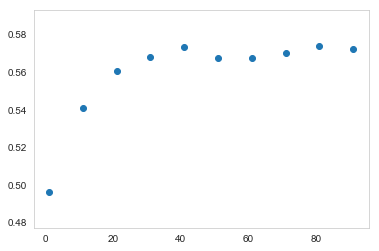

In [113]:
from sklearn.ensemble import RandomForestClassifier
# Plot the correlation between n_estimators and accuracy

# X_train_sample = X_train.head(5000) # this is series
# y_train_sample = y_train[:5000] # this is array

# print (X_train_sample.shape)
# print (y_train_sample.shape)

n = range (1,100,10) #step 10

results = []
for i in n:
    clf = Pipeline([('vect', tfidf),
                ('clf', RandomForestClassifier(n_estimators = i, random_state=0))])
    clf.fit(X_train, y_train)
    predictions = clf.predict(X_test)
    results.append(accuracy_score(y_test, predictions))
plt.grid()
plt.scatter(n, results)

It is shown that with approximately 40 trees, Random Forest classifier starts reaching the highest performance.

In [114]:
tfidf = TfidfVectorizer(lowercase=False,
                        tokenizer=tokenizer_porter,
                        preprocessor=preprocessor)
clf = Pipeline([('vect', tfidf),
                ('clf', RandomForestClassifier(n_estimators = 40, random_state=0))])

clf.fit(X_train, y_train)

predictions = clf.predict(X_test)
print('Accuracy:',accuracy_score(y_test,predictions))
print('Confusion matrix:\n',confusion_matrix(y_test,predictions))
print('Classification report:\n',classification_report(y_test,predictions))

Accuracy: 0.570738773539353
Confusion matrix:
 [[ 700  259  177]
 [ 122 1195  293]
 [ 155  772  469]]
Classification report:
               precision    recall  f1-score   support

           0       0.72      0.62      0.66      1136
           1       0.54      0.74      0.62      1610
           2       0.50      0.34      0.40      1396

   micro avg       0.57      0.57      0.57      4142
   macro avg       0.58      0.56      0.56      4142
weighted avg       0.57      0.57      0.56      4142



Try with SVM

In [115]:
from sklearn.svm import SVC

tfidf = TfidfVectorizer(lowercase=False,
                        tokenizer=tokenizer_porter,
                        preprocessor=preprocessor)
clf = Pipeline([('vect', tfidf),
                ('clf', SVC(kernel = 'linear'))])
clf.fit(X_train, y_train)

predictions = clf.predict(X_test)
print('Accuracy:',accuracy_score(y_test,predictions))
print('Confusion matrix:\n',confusion_matrix(y_test,predictions))
print('Classification report:\n',classification_report(y_test,predictions))

Accuracy: 0.598020280057943
Confusion matrix:
 [[ 858  117  161]
 [ 219 1010  381]
 [ 243  544  609]]
Classification report:
               precision    recall  f1-score   support

           0       0.65      0.76      0.70      1136
           1       0.60      0.63      0.62      1610
           2       0.53      0.44      0.48      1396

   micro avg       0.60      0.60      0.60      4142
   macro avg       0.59      0.61      0.60      4142
weighted avg       0.59      0.60      0.59      4142



Experimental Results

Accuracy:

Logistic Regression: 59.95%, 
Random Forest: 57.07%, 
SVM: 59.80%


# Adding content of Description into Text

In [116]:
data.head(5)

,gender,description,fav_number,link_color,name,retweet_count,sidebar_color,text
0,male,i sing my own rhythm.,0,08C2C2,sheezy0,0,FFFFFF,Robbie E Responds To Critics After Win Against...
1,male,I'm the author of novels filled with family dr...,68,0084B4,DavdBurnett,0,C0DEED,ÛÏIt felt like they were my friends and I was...
3,male,"Mobile guy. 49ers, Shazam, Google, Kleiner Pe...",202,0084B4,douggarland,0,C0DEED,Hi @JordanSpieth - Looking at the url - do you...
4,female,Ricky Wilson The Best FRONTMAN/Kaiser Chiefs T...,37318,3B94D9,WilfordGemma,0,0,Watching Neighbours on Sky+ catching up with t...
5,female,you don't know me.,3901,F5ABB5,monroevicious,0,0,"Ive seen people on the train with lamps, chair..."


Concatenating 'description' to 'text'

In [117]:
#Fill NaN with empty string
data.fillna("", inplace = True)

# Concatenate text with description, add white space between. 
# By using Series helper functions Series.str()
data['text_description'] = data['text'].str.cat(data['description'], sep=' ')

data['text_description'].isnull().value_counts() # Check if any null values, True if there is at least one.

False    13804
Name: text_description, dtype: int64

Re-create training dataset

In [118]:
# split the dataset in train and test
X = data['text_description']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0, stratify=y)


Try with Logistic Regression

In [119]:
from sklearn.linear_model import LogisticRegression

tfidf = TfidfVectorizer(lowercase=False,
                        tokenizer=tokenizer_porter,
                        preprocessor=preprocessor)
clf = Pipeline([('vect', tfidf),
                ('clf', LogisticRegression(multi_class='ovr', random_state=0))])

clf.fit(X_train, y_train)

predictions = clf.predict(X_test)
print('Accuracy:',accuracy_score(y_test,predictions))
print('Confusion matrix:\n',confusion_matrix(y_test,predictions))
print('Classification report:\n',classification_report(y_test,predictions))

C:\Program Files\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Accuracy: 0.6817962337035248
Confusion matrix:
 [[ 959   80   97]
 [ 137 1192  281]
 [ 191  532  673]]
Classification report:
               precision    recall  f1-score   support

           0       0.75      0.84      0.79      1136
           1       0.66      0.74      0.70      1610
           2       0.64      0.48      0.55      1396

   micro avg       0.68      0.68      0.68      4142
   macro avg       0.68      0.69      0.68      4142
weighted avg       0.68      0.68      0.67      4142



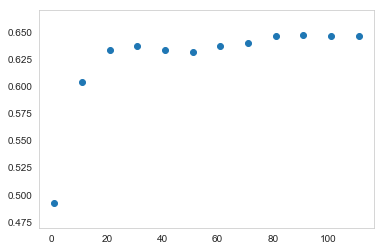

In [120]:
# Plot the correlation between n_estimators and accuracy

# X_train_sample = X_train.head(5000) # this is series
# y_train_sample = y_train[:5000] # this is array

# print (X_train_sample.shape)
# print (y_train_sample.shape)

n = range (1,120,10) #step 10

results = []
for i in n:
    clf = Pipeline([('vect', tfidf),
                ('clf', RandomForestClassifier(n_estimators = i, random_state=0))])
    clf.fit(X_train, y_train)
    predictions = clf.predict(X_test)
    results.append(accuracy_score(y_test, predictions))
plt.grid()    
plt.scatter(n, results)

It is shown that with approximately 80 trees, Random Forest classifier starts reaching the highest performance.

In [121]:
from sklearn.ensemble import RandomForestClassifier

tfidf = TfidfVectorizer(lowercase=False,
                        tokenizer=tokenizer_porter,
                        preprocessor=preprocessor)
clf = Pipeline([('vect', tfidf),
                ('clf', RandomForestClassifier(n_estimators = 80, random_state=0))])

clf.fit(X_train, y_train)

predictions = clf.predict(X_test)
print('Accuracy:',accuracy_score(y_test,predictions))
print('Confusion matrix:\n',confusion_matrix(y_test,predictions))
print('Classification report:\n',classification_report(y_test,predictions))

Accuracy: 0.6438918396909705
Confusion matrix:
 [[ 883  147  106]
 [ 108 1339  163]
 [ 143  808  445]]
Classification report:
               precision    recall  f1-score   support

           0       0.78      0.78      0.78      1136
           1       0.58      0.83      0.69      1610
           2       0.62      0.32      0.42      1396

   micro avg       0.64      0.64      0.64      4142
   macro avg       0.66      0.64      0.63      4142
weighted avg       0.65      0.64      0.62      4142



Try with SVM

In [122]:
from sklearn.svm import SVC

tfidf = TfidfVectorizer(lowercase=False,
                        tokenizer=tokenizer_porter,
                        preprocessor=preprocessor)
clf = Pipeline([('vect', tfidf),
                ('clf', SVC(kernel = 'linear'))])
clf.fit(X_train, y_train)

predictions = clf.predict(X_test)
print('Accuracy:',accuracy_score(y_test,predictions))
print('Confusion matrix:\n',confusion_matrix(y_test,predictions))
print('Classification report:\n',classification_report(y_test,predictions))

Accuracy: 0.6868662481892805
Confusion matrix:
 [[ 952   82  102]
 [ 117 1169  324]
 [ 178  494  724]]
Classification report:
               precision    recall  f1-score   support

           0       0.76      0.84      0.80      1136
           1       0.67      0.73      0.70      1610
           2       0.63      0.52      0.57      1396

   micro avg       0.69      0.69      0.69      4142
   macro avg       0.69      0.69      0.69      4142
weighted avg       0.68      0.69      0.68      4142



Experimental Results

Accuracy:

Logistic Regression: 68.17%, 
Random Forest: 64.38%, 
SVM: 68.68%

# Try Ensemble technique - Take advantage of both 3 models

In [123]:
from sklearn.ensemble import VotingClassifier
clf1 = LogisticRegression(multi_class='ovr', random_state=0)
clf2 = RandomForestClassifier(n_estimators = 80, random_state=0)
clf3 = SVC(kernel = 'linear',probability = True, random_state=0)

ensemble_clf = VotingClassifier(estimators=[
        ('lr', clf1), ('rf', clf2), ('svm', clf3)], voting='soft')

clf = Pipeline([('vect', tfidf),
                ('clf', ensemble_clf)])

clf.fit(X_train, y_train)

# ensemble_clf.fit(X_train, y_train)

predictions = clf.predict(X_test)
print('Accuracy:',accuracy_score(y_test,predictions))
print('Confusion matrix:\n',confusion_matrix(y_test,predictions))
print('Classification report:\n',classification_report(y_test,predictions))

C:\Program Files\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Accuracy: 0.6897633993239981
Confusion matrix:
 [[ 960   84   92]
 [ 120 1241  249]
 [ 172  568  656]]
Classification report:
               precision    recall  f1-score   support

           0       0.77      0.85      0.80      1136
           1       0.66      0.77      0.71      1610
           2       0.66      0.47      0.55      1396

   micro avg       0.69      0.69      0.69      4142
   macro avg       0.69      0.70      0.69      4142
weighted avg       0.69      0.69      0.68      4142



# Final Accuracy: 68.97%

# ----------------------------------------------------------------------- ###